In [20]:
from pleiades.wipplsystems import BRB
from pleiades.grids import RectGrid
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

# make R,Z grid from 0,1,101 -.5,.5,101
grid = RectGrid((0,1.75,151),(-1.75,1.75,151))
brb = BRB()
brb.trex.currents = 50,50
brb.ltrx.currents = 2000,2000
#c1,c2,c3 = brb.vessel_mags.currents
#brb.vessel_mags.currents = (0,c2,0)
brb.grid = grid

In [21]:
# Get fields from BRB object and mask values outside the sphere
R,Z = grid.R,grid.Z
psi = brb.psi
B = np.sqrt(brb.BR**2 + brb.BZ**2)
# mask values not inside radius of 1.525m
inside = np.sqrt(R**2+Z**2)< 1.535
psi[~inside] = np.nan
B[~inside] = np.nan

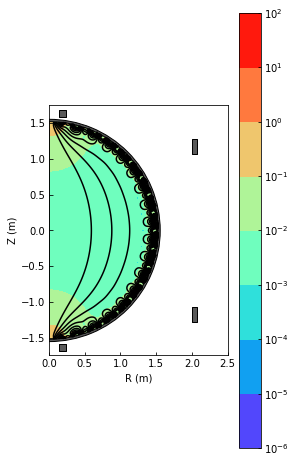

In [22]:
# Plotting Section
fig,ax = plt.subplots(figsize=(4,8))
cf = ax.contourf(R,Z,B,101,cmap="rainbow",locator=ticker.LogLocator())
ax.contour(R,Z,psi,51,colors="k")
plt.colorbar(cf)
ax.set_xlim(0,2.5)
ax.set_ylim(-1.75,1.75)
ax.set_xlabel("R (m)")
ax.set_ylabel("Z (m)")
ax.set_aspect(1)
ax.add_collection(brb.patch_coll)
plt.show()